<a href="https://colab.research.google.com/github/raulbenitez/postgrau_IML_exploratory/blob/master/miniproject2/mini_project2_Barcelona_Raiza.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

immin = pd.read_csv('/content/drive/My Drive/immigrants_by_nationality.csv')
immin.head ()

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


,Year,District Code,District Name,Neighborhood Code,Neighborhood Name,Nationality,Number
0,2017,1,Ciutat Vella,1,el Raval,Spain,1109
1,2017,1,Ciutat Vella,2,el Barri Gòtic,Spain,482
2,2017,1,Ciutat Vella,3,la Barceloneta,Spain,414
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Spain,537
4,2017,2,Eixample,5,el Fort Pienc,Spain,663


In [2]:
immin.shape

(35224, 7)

In [3]:
immin.columns

Index(['Year', 'District Code', 'District Name', 'Neighborhood Code',
       'Neighborhood Name', 'Nationality', 'Number'],
      dtype='object')

In [4]:
immin.dtypes

Year                  int64
District Code         int64
District Name        object
Neighborhood Code     int64
Neighborhood Name    object
Nationality          object
Number                int64
dtype: object

In [5]:
immin_num= immin.select_dtypes(include='number')
immin_num.shape

(35224, 4)

In [6]:

immin_num.head()

,Year,District Code,Neighborhood Code,Number
0,2017,1,1,1109
1,2017,1,2,482
2,2017,1,3,414
3,2017,1,4,537
4,2017,2,5,663


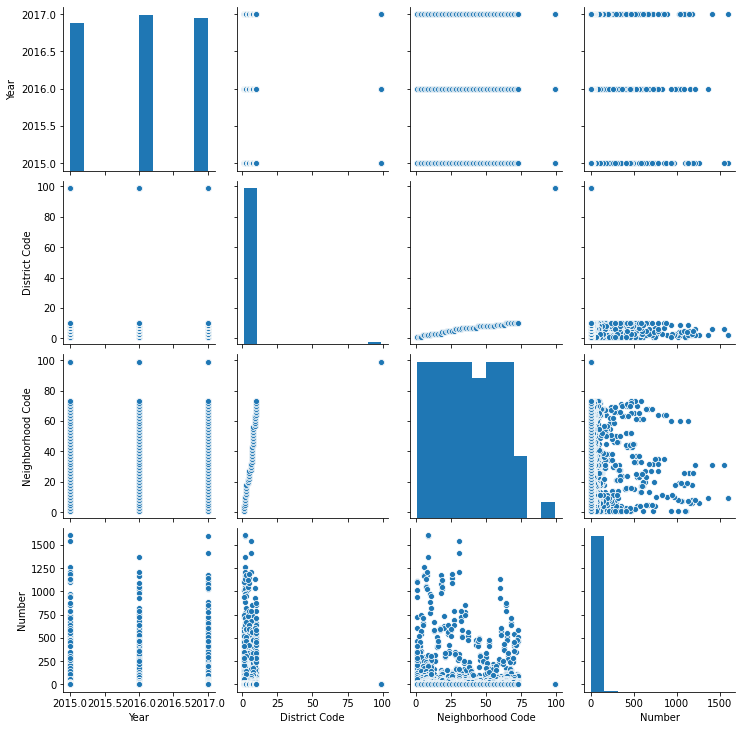

In [7]:
import seaborn as sns

sns.pairplot(immin_num)
plt.show()

In [0]:

imming = immin.groupby(['Neighborhood Code'])

In [9]:
imming.head ()

,Year,District Code,District Name,Neighborhood Code,Neighborhood Name,Nationality,Number
0,2017,1,Ciutat Vella,1,el Raval,Spain,1109
1,2017,1,Ciutat Vella,2,el Barri Gòtic,Spain,482
2,2017,1,Ciutat Vella,3,la Barceloneta,Spain,414
3,2017,1,Ciutat Vella,4,"Sant Pere, Santa Caterina i la Ribera",Spain,537
4,2017,2,Eixample,5,el Fort Pienc,Spain,663
...,...,...,...,...,...,...,...
365,2017,10,Sant Martí,70,el Besòs i el Maresme,Venezuela,37
366,2017,10,Sant Martí,71,Provençals del Poblenou,Venezuela,29
367,2017,10,Sant Martí,72,Sant Martí de Provençals,Venezuela,41
368,2017,10,Sant Martí,73,la Verneda i la Pau,Venezuela,34


In [10]:
immin_num_nonans = immin_num.dropna ()
immin_num_nonans.shape


(35224, 4)

In [11]:
immin_num_nonans

,Year,District Code,Neighborhood Code,Number
0,2017,1,1,1109
1,2017,1,2,482
2,2017,1,3,414
3,2017,1,4,537
4,2017,2,5,663
...,...,...,...,...
35219,2015,10,70,0
35220,2015,10,71,0
35221,2015,10,72,0
35222,2015,10,73,1


In [0]:
X = immin_num_nonans
y = immin['Nationality']

In [0]:
from sklearn.preprocessing import StandardScaler #escalar datos, evita diferencias en unidades numericas etc
XS = StandardScaler().fit_transform(X)

In [14]:
XS.shape

(35224, 4)

In [0]:
from sklearn import decomposition #DESCOMPOSICION PCA

pca = decomposition.PCA(n_components=4).fit(XS)

In [16]:
print('varianza explicada acumulada ={}'.format(100*pca.explained_variance_ratio_.cumsum()))

varianza explicada acumulada =[ 38.86669146  63.90391824  88.66395318 100.        ]


In [0]:
Xproj = pca.transform(XS) # proyecto data a espacio PCA

In [18]:
XPCA = Xproj[:,0:3] # Reducir dimensionalidad de los datos quedandonos solamente con tres componentes PCA

print('Dimensionalidad datos en espacio PCA reducido = {}'.format(XPCA.shape))

Dimensionalidad datos en espacio PCA reducido = (35224, 3)


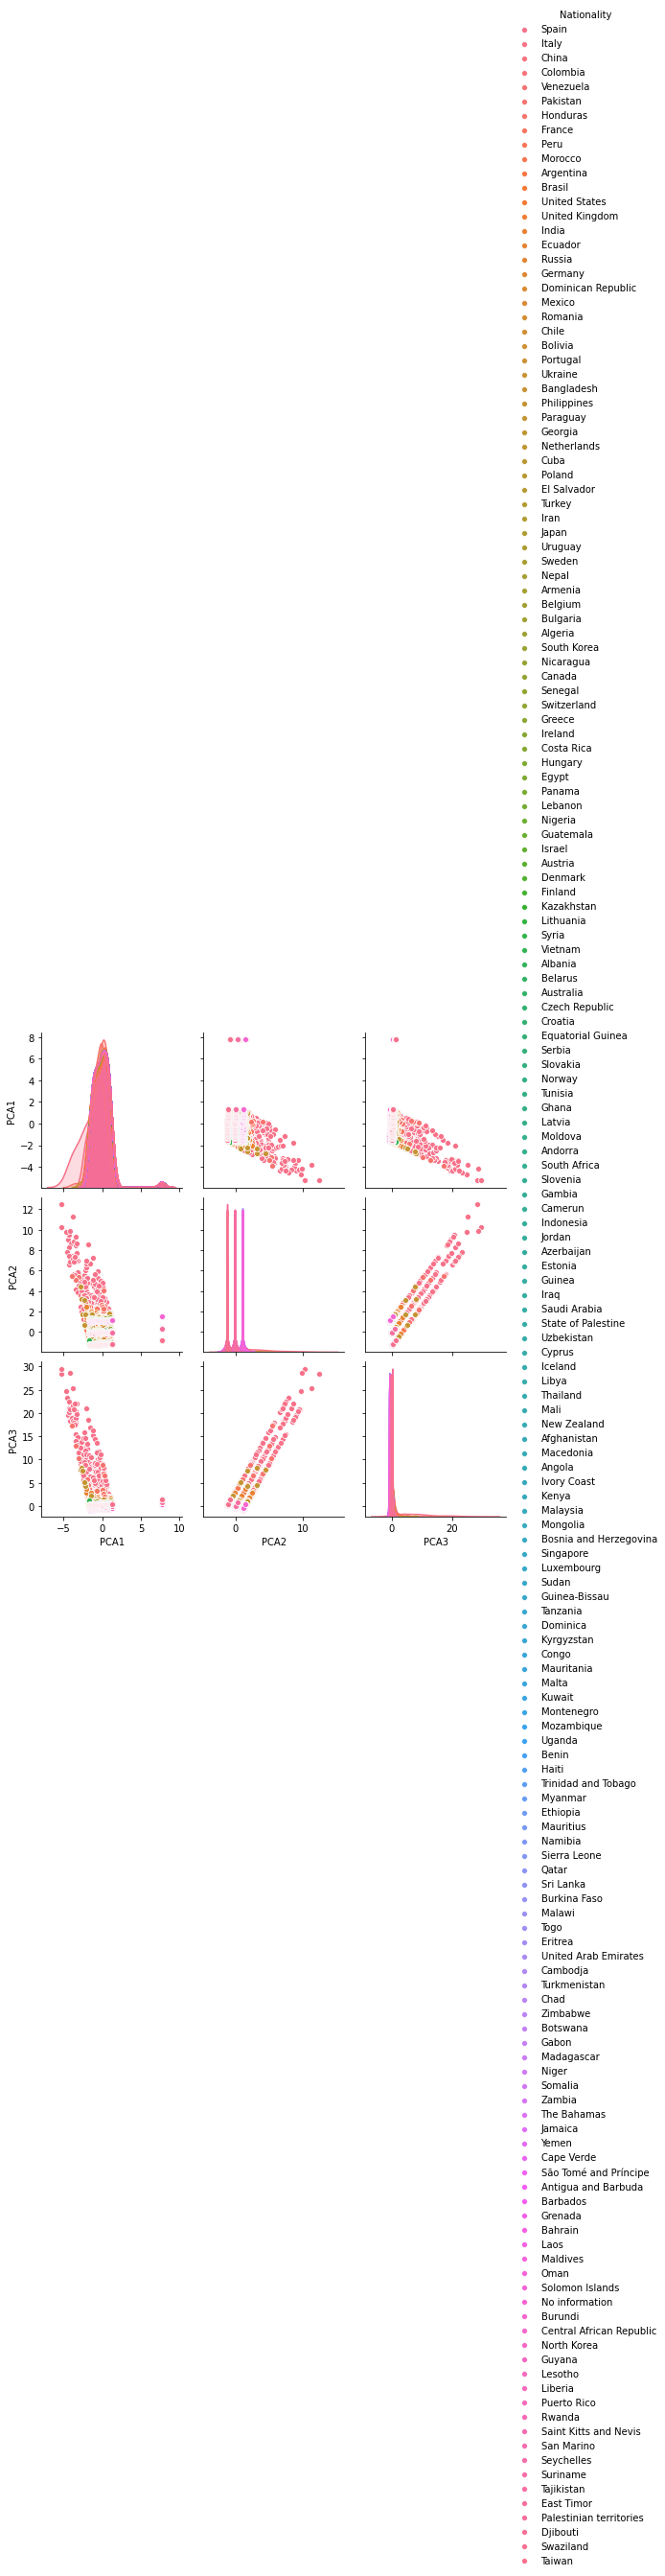

In [19]:
d = pd.DataFrame(XPCA,columns=['PCA1', 'PCA2','PCA3'])
d ['Nationality']= y
sns.pairplot(d, hue='Nationality')
plt.show()

In [20]:
d.shape

(35224, 4)

In [21]:
y.shape

(35224,)

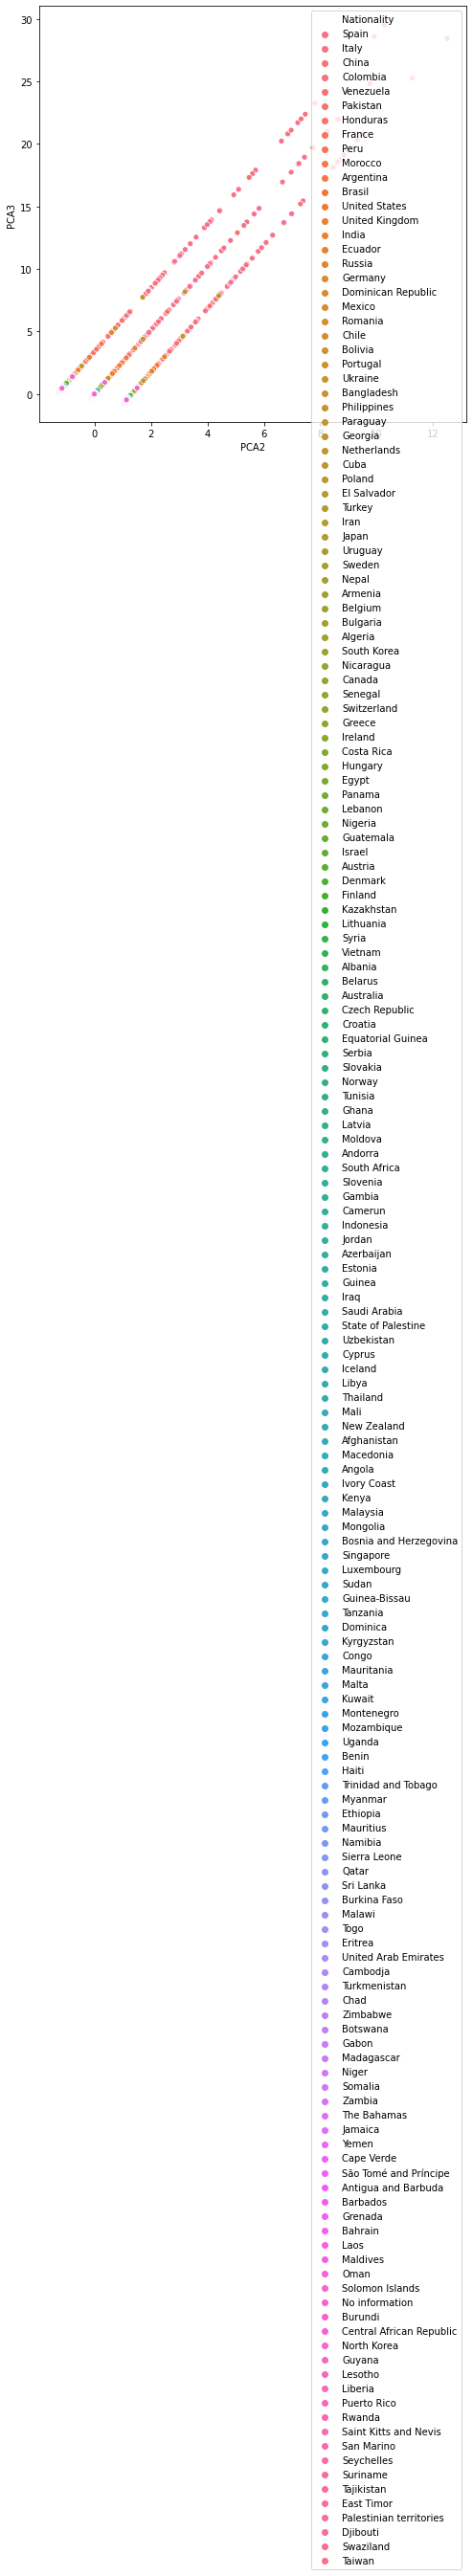

In [22]:

d = pd.DataFrame(XPCA,columns=['PCA1','PCA2','PCA3'])

fig = plt.figure(figsize=(8,8))

ax = sns.scatterplot(x="PCA2", y="PCA3", hue=y,data=d)
plt.show()

In [23]:
from sklearn.feature_selection import SelectKBest, chi2

X_new = SelectKBest(chi2, k=1).fit_transform(X, y)
X_new.shape

(35224, 1)

In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC
from sklearn.datasets import load_digits
from sklearn.feature_selection import RFE

immin = pd.read_csv('/content/drive/My Drive/immigrants_by_nationality.csv')


immin_nonan = immin.dropna()
immin_num= immin_nonan.select_dtypes(include='number')

X = immin_num
y = immin_nonan ['Nationality']


# Create the RFE object and rank each variable
svc = SVC(kernel="linear")
rfe = RFE(estimator=svc, n_features_to_select=1, step=1)
rfe.fit(X, y)
print('Kept features: {}'.format(rfe.support_))
print('Ranking of the features: {}'.format(rfe.ranking_))

Kept features: [False False False  True]
Ranking of the features: [2 3 4 1]


/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:288: UserWarning: Data must have variance to c

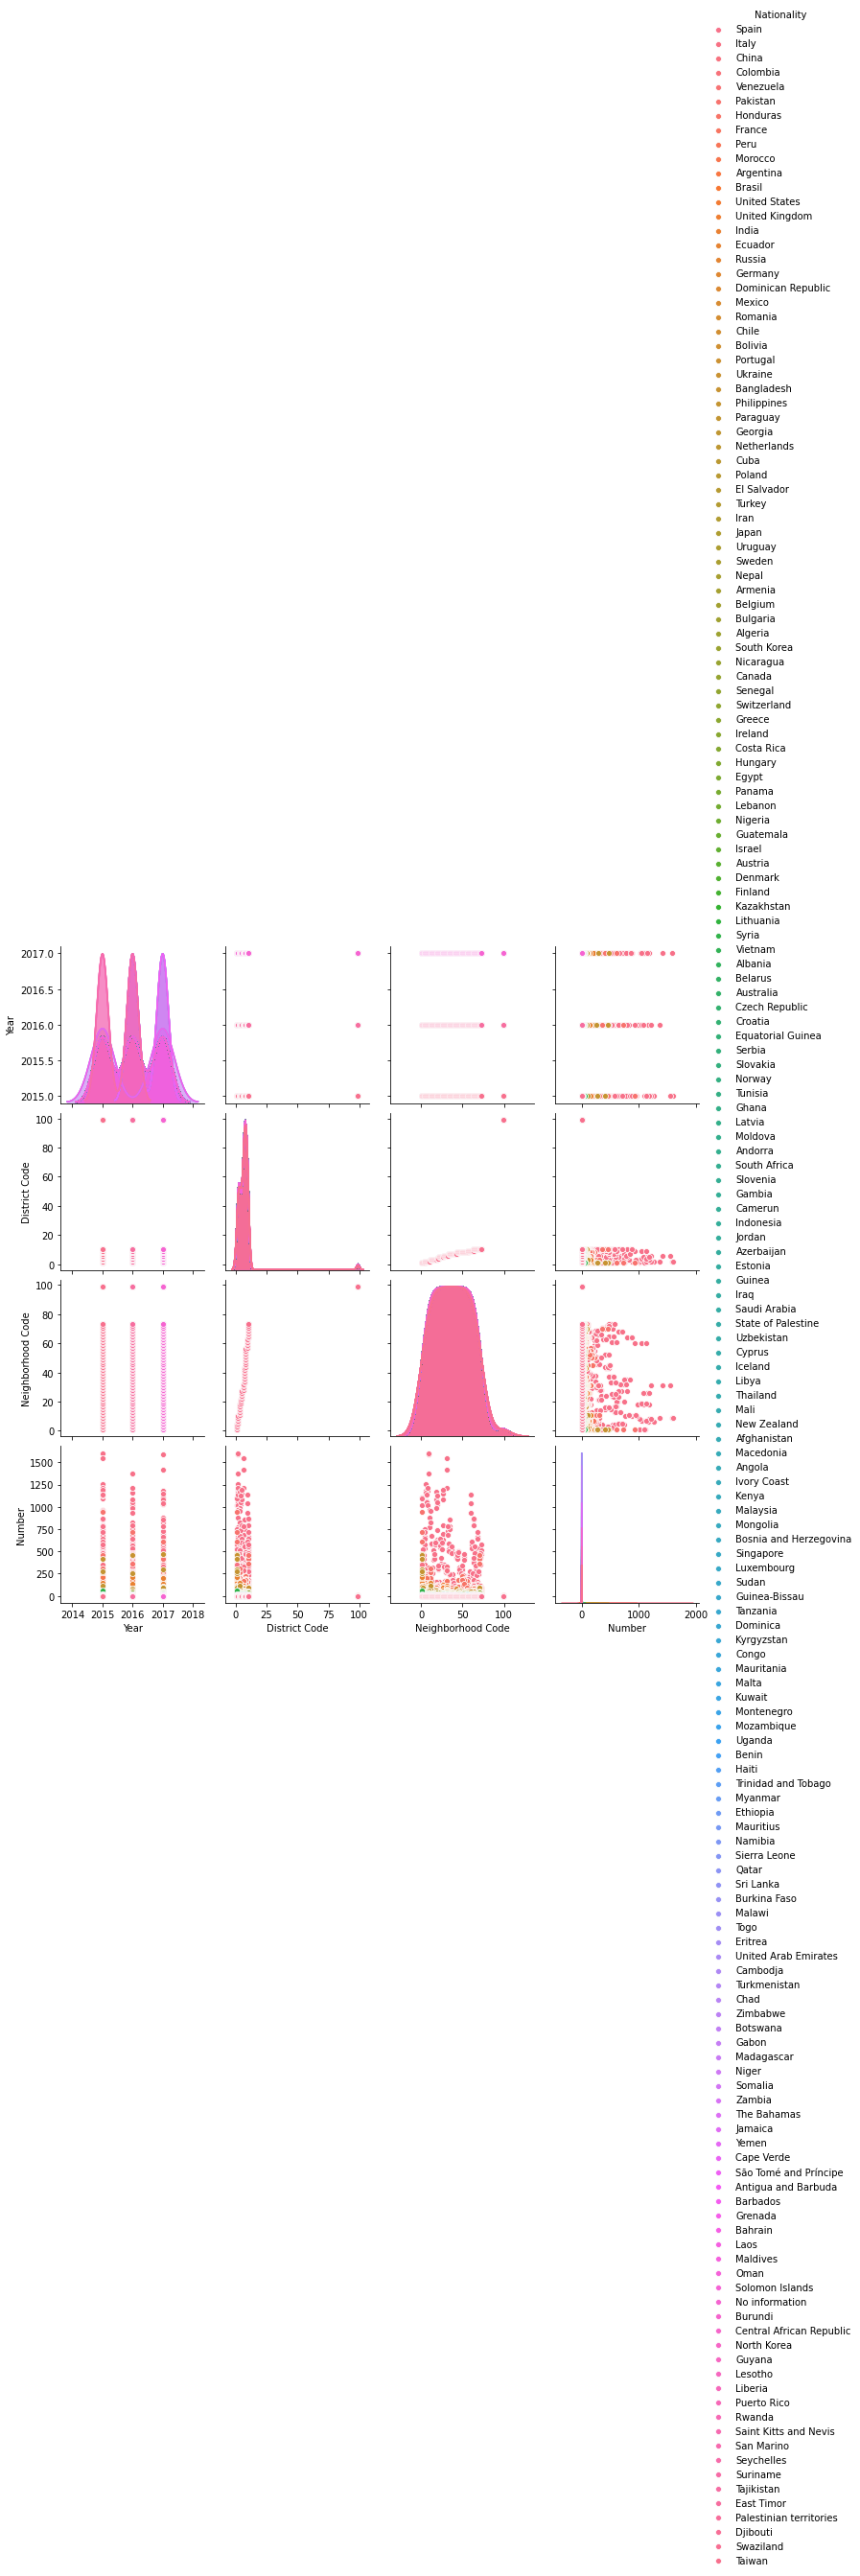

In [28]:
import seaborn as sns    #neighborhood code the most discriminative
import matplotlib.pyplot as plt
sns.pairplot(immin_nonan,hue='Nationality')
plt.show()